In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/gdrive/My Drive/DS_contest/trainSet.csv')
data

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,...,CND_MONTH_33,CND_MONTH_34,CND_MONTH_35,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
0,354,134,3323,3298,15384,10746,0.583087,0.520701,0.202393,2015/05/21,2015/05/01,2021/07/31,Oil: CWS-DynaGel,1197.61,66.53,3214.70,178.59,18,1249.60,73.50,1148.37,3248.30,2.57,0.96,Ceramic/Sand,FTecISP,30/50,35.48,638.70,638.70,558.91,99580.58333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,372,142,3073,3054,20167,10440,1.059932,0.402927,0.242269,2014/10/16,2014/10/01,2021/07/31,Water: SLB-WaterFrac (WF),4212.32,117.01,9727.20,270.20,36,2711.90,77.41,1604.27,11438.43,3.59,1.55,Ceramic/Sand,HydroProp,40/80,13.80,496.97,496.97,3715.35,82942.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,383,146,3318,3291,18832,10745,1.913723,0.351151,0.274381,2019/03/14,2019/03/01,2021/07/31,Slickwater,5131.40,95.03,52997.80,981.44,54,2275.37,42.88,914.98,52997.80,23.29,2.26,Sand,Sand,40/70,95.03,5131.40,0.00,5131.40,55833.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,395,148,3220,3188,20243,10884,0.185481,0.231014,0.305237,2019/03/19,2019/02/01,2021/07/31,Slickwater,3044.00,49.90,42791.76,701.50,61,2687.20,43.04,0.00,51059.60,15.92,1.13,Sand,White,40/70,49.90,3044.00,0.00,3044.00,95592.08333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,397,149,3220,3189,19085,10916,0.432910,0.214301,0.306795,2019/03/19,2019/02/01,2021/07/31,Slickwater,5374.00,99.52,50769.92,940.18,54,2351.45,42.70,0.00,53236.05,21.59,2.29,Sand,White,40/70,99.09,5351.00,0.00,5374.00,104730.33330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,708,286,3048,3027,19462,10351,0.061657,0.368939,0.543000,2017/09/19,2017/09/01,2021/07/31,Slickwater,6209.34,159.21,4493

In [ ]:
data_exam = pd.read_csv('/gdrive/My Drive/DS_contest/examSet.csv')
data_exam

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,...,CND_MONTH_23,CND_MONTH_24,CND_MONTH_25,CND_MONTH_26,CND_MONTH_27,CND_MONTH_28,CND_MONTH_29,CND_MONTH_30,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,PRICE ($),Per Month Operation Cost ($)
0,37,17,3104,3075,19026,10367,0.239762,0.832863,0.050555,2019.11.13,2019.11.1,2021.7.31,Slickwater: STEP-SW,4278.80,43.22,34670.30,350.21,99,2431.90,24.79,55.57,34670.30,14.26,1.76,Sand,Domestic,40/70,11.74,1162.50,0.00,4278.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1129000,100000
1,41,18,3104,3075,19308,10516,0.321130,0.836306,0.054441,2019.11.13,2019.11.1,2021.7.31,STEP-SW,4707.00,34.61,39106.10,287.54,136,2548.10,19.07,0.00,39188.12,15.35,1.85,Sand,Domestic,40/70,0.32,44.00,0.00,4707.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751000,50000
2,43,19,3104,3075,18858,10355,0.360643,0.840475,0.057302,2019.11.15,2019.11.1,2021.7.31,Slickwater: STEP-SW,3803.10,28.81,36685.28,277.92,132,2489.20,18.92,0.00,36685.30,14.74,1.53,Sand,Domestic,40/70,28.81,3803.10,0.00,3803.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,872000,50000
3,60,20,3105,3077,20243,10136,3.384058,0.876305,0.089248,2019.10.31,2019.10.31,2021.7.31,Slickwater: STEP-SW,4461.10,42.49,31742.20,302.31,105,2679.60,24.98,409.70,31808.00,11.85,1.66,Sand,Imported,40/70,42.49,4461.10,0.00,4461.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1114000,100000
4,66,23,3038,3017,19797,10164,1.197697,0.887815,0.131267,2019.10.19,2019.9.1,2021.7.31,Slickwater: STEP-SW,5330.00,79.55,46521.20,694.35,67,2851.90,42.98,0.00,49547.50,16.31,1.87,Sand,Imported,40/70,79.55,5330.00,0.00,5330.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2558000,100000
5,68,24,3038,3018,19587,9971,1.259390,0.882960,0.127366,2019.10.19,2019.9.1,2021.7.31,Slickwater: STEP-SW,5167.00,79.49,44406.60,683.18,65,2744.40,42.64,0.00,46753.00,16.18,1.88,Sand,Domestic,40/70,75.91,4934.00,0.00,5167.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1125000,100000
6,70,25,3044,3016,20922,10160,0.459236,0.912956,

In [ ]:
data.columns

Index(['No', 'CPA Pretty Well ID', 'Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)', 'TVD (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)', 'On Prod YYYY/MM/DD',
       ...
       'HRS_MONTH_27', 'HRS_MONTH_28', 'HRS_MONTH_29', 'HRS_MONTH_30',
       'HRS_MONTH_31', 'HRS_MONTH_32', 'HRS_MONTH_33', 'HRS_MONTH_34',
       'HRS_MONTH_35', 'HRS_MONTH_36'],
      dtype='object', length=141)

In [ ]:
data_exam.columns

Index(['No', 'CPA Pretty Well ID', 'Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)', 'TVD (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)', 'On Prod YYYY/MM/DD',
       ...
       'HRS_MONTH_23', 'HRS_MONTH_24', 'HRS_MONTH_25', 'HRS_MONTH_26',
       'HRS_MONTH_27', 'HRS_MONTH_28', 'HRS_MONTH_29', 'HRS_MONTH_30',
       'PRICE ($)', 'Per Month Operation Cost ($)'],
      dtype='object', length=123)

In [ ]:
# df1.to_csv('/gdrive/My Drive/DS_contest/df1.csv')

In [ ]:
#length 29(i=0 to 28)의 data2 list 만들기 (각각의 원소는 series)
data2 = []
for i in range(15,44):
  data2.append(data_exam.iloc[i])
data2[0]

No                                 724
CPA Pretty Well ID                 291
Reference (KB) Elev. (ft)         3075
Ground Elevation (ft)             3059
MD (All Wells) (ft)              19242
                                 ...  
HRS_MONTH_28                       527
HRS_MONTH_29                       713
HRS_MONTH_30                       703
PRICE ($)                       292000
Per Month Operation Cost ($)     30000
Name: 15, Length: 123, dtype: object

In [ ]:
#GAS_MONTH_1 ~ 30, Last 6 mo. Avg. GAS (Mcf), CND_MON_1 ~ 30, HRS_MONTH_1 ~ 30
#GAS , CND, HRS, time (1~30)]

#arb[i]는 series, data2[i], arbdf[i]는 데이터프레임
arb = []
arbdf = []
for i in range(29):
  arb.append(data2[i])
  data2[i] = data2[i].to_frame().transpose()
  arbdf.append(data2[i])
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,...,CND_MONTH_23,CND_MONTH_24,CND_MONTH_25,CND_MONTH_26,CND_MONTH_27,CND_MONTH_28,CND_MONTH_29,CND_MONTH_30,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,PRICE ($),Per Month Operation Cost ($)
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000


In [ ]:
for i in range(29):
  for j in range(9):
    data2[i] = pd.concat([data2[i],arbdf[i]],axis=0,sort=False, join='outer')
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,...,CND_MONTH_23,CND_MONTH_24,CND_MONTH_25,CND_MONTH_26,CND_MONTH_27,CND_MONTH_28,CND_MONTH_29,CND_MONTH_30,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,PRICE ($),Per Month Operation Cost ($)
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000
15,724,291,3075,3059,19242,10260,

In [ ]:
# 31~60 GAS, 68:Last 6 mo. Avg. GAS (Mcf), 91~120 HRS
for i in range(29):
  GAS_list = []
  HRS_list = []
  ID_index = []
  for j in range(10):
    GAS_list.append(arb[i][3*j+31]+arb[i][3*j+32]+arb[i][3*j+33])
    HRS_list.append(arb[i][3*j+91]+arb[i][3*j+92]+arb[i][3*j+93])
    ID_index.append(i)
  data2[i]['Y_t'] = GAS_list
  data2[i]['J_t'] = HRS_list
  data2[i]['ID index'] = ID_index
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,...,CND_MONTH_26,CND_MONTH_27,CND_MONTH_28,CND_MONTH_29,CND_MONTH_30,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000,121695.0,776.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000,234462.0,1258.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000,285696.0,1793.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000,216567.0,1069.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000,186633.0,1531.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000,63690.0,1970.0,0
15,724,291,3075,3059,19242,10260,3.1432

In [ ]:
for i in range(29):
  for j in range(30):
    data2[i] = data2[i].drop('GAS_MONTH_'+str(j+1),axis=1)
    data2[i] = data2[i].drop('CND_MONTH_'+str(j+1),axis=1)
    data2[i] = data2[i].drop('HRS_MONTH_'+str(j+1),axis=1)
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,121695.0,776.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,234462.0,1258.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,285696.0,1793.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,216567.0,1069.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,186633.0,1531.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,63690.0,1970.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,63495.0,583.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,39849.0,2080.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,29688.0,2062.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,38481.0,1943.0,0


In [ ]:
import datetime as dt

In [ ]:
for i in range(29):
  time_list = []
  # time_list의 첫항은 (Last month - on month)/3 + 1
  time_list.append((dt.datetime.strptime(arb[i]['Last Prod. YYYY/MM'],'%Y.%m.%d') - dt.datetime.strptime(arb[i]['On Prod YYYY/MM/DD'],'%Y.%m.%d') - dt.timedelta(days=1095)).days // 92 + 1)
  for j in range(9):
    time_list.append(time_list[j]+1)
  data2[i]['time'] = time_list
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,121695.0,776.0,0,17
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,234462.0,1258.0,0,18
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,285696.0,1793.0,0,19
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,216567.0,1069.0,0,20
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,186633.0,1531.0,0,21
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,63690.0,1970.0,0,22
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,63495.0,583.0,0,23
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,39849.0,2080.0,0,24
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,29688.0,2062.0,0,25
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,38481.0,1943.0,0,26


In [ ]:
#df2는 2번생산정만 포함, 각 생산정마다 6row 가짐.
df2 = data2[0]
for i in range(28):
  df2 = pd.concat([df2,data2[i+1]],axis=0,sort=False, join='outer')
df2

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,121695.0,776.0,0,17
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,234462.0,1258.0,0,18
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,285696.0,1793.0,0,19
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,216567.0,1069.0,0,20
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,186633.0,1531.0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,863,343,2564,2547,17421,9371,0.614055,0.471519,1,2013.10.26,2013.10.1,2021.7.31,Oil: HAL-My-T-Oil,962,45.81,3283.6,156.36,21,2189.7,95.2,1097.09,3253.23,1.5,0.44,Ceramic/Sand,EconoProp,30/50,21.1,443,443,519,591000,50000,74478.0,1642.0,28,24
43,863,343,2564,2547,17421,9371,0.614055,0.471519,1,2013.10.26,2013.10.1,2021.7.31,Oil: HAL-My-T-Oil,962,45.81,3283.6,156.36,21,2189.7,95.2,1097.09,3253.23,1.5,0.44,Ceramic/Sand,EconoProp,30/50,21.1,443,443,519,591000,50000,10482.0,123.0,28,25
43,863,343,2564,2547,17421,9371,0.614055,0.471519,1,2013.10.26,2013.10.1,2021.7.31,Oil: HAL-My-T-Oil,962,45.81,3283.6,156.36,21,2189.7,95.2,1097.09,3253.23,1.5,0.44,Ceramic/Sand,EconoProp,30/50,21.1,443,443,519,591000,50000,84810.0,187.0,28,26
43,863,343,2564,2547,17421,9371,0.614055,0.471519,1,2013.10.26,2013.10.1,2021.7.31,Oil: HAL-My-T-Oil,962,45.81,3283.6,156.36,21,2189.7,95.2,1097.09,3253.23,1.5,0.44,Ceramic/Sand,EconoProp,30/50,21.1,443,443,519,591000,50000,96483.0,1125.0,28,27


In [ ]:
df2.columns

Index(['No', 'CPA Pretty Well ID', 'Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)', 'TVD (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)', 'On Prod YYYY/MM/DD', 'First Prod YYYY/MM',
       'Last Prod. YYYY/MM', 'Stimulation Fluid',
       'Total Proppant Placed (tonne)',
       'Avg Proppant Placed per Stage (tonne)', 'Total Fluid Pumped (m3)',
       'Avg Fluid Pumped per Stage (m3)', 'Stages Actual',
       'Completed Length (m)', 'Avg Frac Spacing (m)', 'Load Fluid Rec (m3)',
       'Load Fluid (m3)', 'Avg Fluid Pumped / Meter (m3)',
       'Avg Proppant Placed / Meter (tonne)', 'Proppant Composition',
       'Proppant Name 1', 'Proppant Size 1', 'Avg Proppant 1 Placed (tonne)',
       'Total Proppant 1 Placed (tonne)',
       'Total Ceramic Proppant Placed (tonne)',
       'Total Sand Proppant Placed (tonne)', 'PRICE ($)',
       'Per Month Operation Cost ($)', 'Y_t', 'J_t', 'ID index'

In [ ]:
df2 = df2.drop(['CPA Pretty Well ID', 'Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)', 'TVD (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)', 'On Prod YYYY/MM/DD', 'First Prod YYYY/MM',
       'Last Prod. YYYY/MM', 'Stimulation Fluid',
       'Total Proppant Placed (tonne)',
       'Avg Proppant Placed per Stage (tonne)', 'Total Fluid Pumped (m3)',
       'Avg Fluid Pumped per Stage (m3)', 'Stages Actual',
       'Completed Length (m)', 'Avg Frac Spacing (m)', 'Load Fluid Rec (m3)',
       'Load Fluid (m3)', 'Avg Fluid Pumped / Meter (m3)',
       'Avg Proppant Placed / Meter (tonne)', 'Proppant Composition',
       'Proppant Name 1', 'Proppant Size 1', 'Avg Proppant 1 Placed (tonne)',
       'Total Proppant 1 Placed (tonne)',
       'Total Ceramic Proppant Placed (tonne)',
       'Total Sand Proppant Placed (tonne)'],axis=1)
df2.head(5)

,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time
15,724,292000,30000,121695.0,776.0,0,17
15,724,292000,30000,234462.0,1258.0,0,18
15,724,292000,30000,285696.0,1793.0,0,19
15,724,292000,30000,216567.0,1069.0,0,20
15,724,292000,30000,186633.0,1531.0,0,21


In [ ]:
df2.head(10)

,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time
15,724,292000,30000,121695.0,776.0,0,17
15,724,292000,30000,234462.0,1258.0,0,18
15,724,292000,30000,285696.0,1793.0,0,19
15,724,292000,30000,216567.0,1069.0,0,20
15,724,292000,30000,186633.0,1531.0,0,21
15,724,292000,30000,63690.0,1970.0,0,22
15,724,292000,30000,63495.0,583.0,0,23
15,724,292000,30000,39849.0,2080.0,0,24
15,724,292000,30000,29688.0,2062.0,0,25
15,724,292000,30000,38481.0,1943.0,0,26


In [ ]:
df2.to_csv('/gdrive/My Drive/DS_contest/Examdatathree.csv')

X_t 처리

In [ ]:
df2['J_t'] += 1

In [ ]:
df2['X_t'] = df2['Y_t']/df2['J_t']
df2.head(5)

,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time,X_t
15,724,292000,30000,121695.0,777.0,0,17,156.621622
15,724,292000,30000,234462.0,1259.0,0,18,186.228753
15,724,292000,30000,285696.0,1794.0,0,19,159.250836
15,724,292000,30000,216567.0,1070.0,0,20,202.399065
15,724,292000,30000,186633.0,1532.0,0,21,121.823107


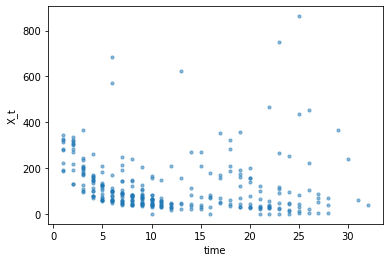

In [ ]:
df2.plot.scatter(x='time', y='X_t',s=10,alpha=0.5)

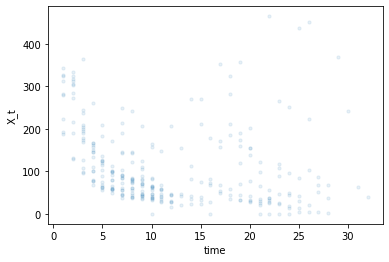

In [ ]:
df2[df2['X_t']<500].plot.scatter(x='time', y='X_t',s=10,alpha=0.1)

X_t가 100 이하인 비율(%): 60.0
X_t가 100 초과 200 이하인 비율(%): 22.413793103448278
X_t가 200 초과 300 이하인 비율(%): 9.655172413793103
X_t가 300 초과 400 이하인 비율(%): 5.172413793103448
X_t가 400 초과 500 이하인 비율(%): 1.0344827586206897
X_t가 500 초과인 비율(%): 1.7241379310344827


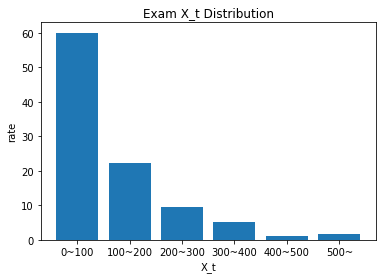

In [ ]:
print('X_t가 100 이하인 비율(%):',(df2[df2['X_t']<=100].size) / (df2.size) * 100)
print('X_t가 100 초과 200 이하인 비율(%):',(df2[(df2['X_t']>100) & (df2['X_t']<=200)].size) / (df2.size) * 100)
print('X_t가 200 초과 300 이하인 비율(%):',(df2[(df2['X_t']>200) & (df2['X_t']<=300)].size) / (df2.size) * 100)
print('X_t가 300 초과 400 이하인 비율(%):',(df2[(df2['X_t']>300) & (df2['X_t']<=400)].size) / (df2.size) * 100)
print('X_t가 400 초과 500 이하인 비율(%):',(df2[(df2['X_t']>400) & (df2['X_t']<=500)].size) / (df2.size) * 100)
print('X_t가 500 초과인 비율(%):',(df2[df2['X_t']>500].size) / (df2.size) * 100)

x = np.arange(6)
distri = ['0~100','100~200','200~300','300~400','400~500','500~']
value = [(df2[df2['X_t']<=100].size) / (df2.size) * 100, (df2[(df2['X_t']>100) & (df2['X_t']<=200)].size) / (df2.size) * 100, \
         (df2[(df2['X_t']>200) & (df2['X_t']<=300)].size) / (df2.size) * 100, (df2[(df2['X_t']>300) & (df2['X_t']<=400)].size) / (df2.size) * 100, \
         (df2[(df2['X_t']>400) & (df2['X_t']<=500)].size) / (df2.size) * 100, (df2[df2['X_t']>500].size) / (df2.size) * 100]
plt.bar(x, value)
plt.xticks(x, distri)
plt.xlabel('X_t')
plt.ylabel('rate')
plt.title('Exam X_t Distribution')
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_X_t_six_Distribution.png')
plt.show()

X_t가 500이하(98.3%의 데이터)인 것을 normal로 잡자

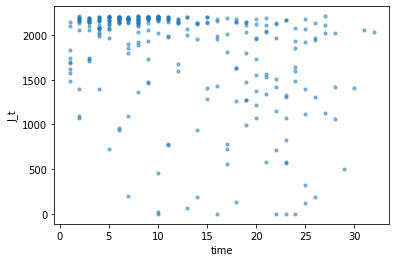

In [ ]:
df2.plot.scatter(x='time', y='J_t',s=10,alpha=0.5)

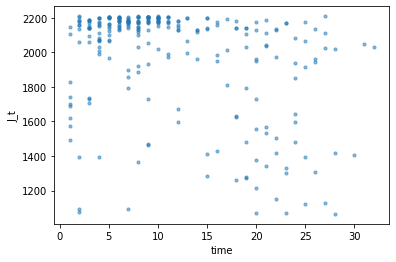

In [ ]:
df2[df2['J_t']>1000].plot.scatter(x='time', y='J_t',s=10,alpha=0.5)

J_t가 500시간 이하인 비율(%): 4.827586206896552
J_t가 500시간 초과 1000시간 이하인 비율(%): 5.517241379310345
J_t가 1000시간 초과 1500시간 이하인 비율(%): 11.379310344827587
J_t가 1500시간 초과 2000시간 이하인 비율(%): 15.517241379310345
J_t가 2000시간 초과 2500시간 이하인 비율(%): 62.758620689655174


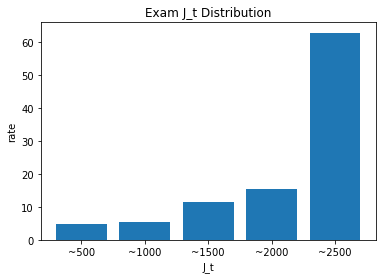

In [ ]:
print('J_t가 500시간 이하인 비율(%):',(df2[df2['J_t']<=500].size) / (df2.size) * 100)
print('J_t가 500시간 초과 1000시간 이하인 비율(%):',(df2[(df2['J_t']>500) & (df2['J_t']<=1000)].size) / (df2.size) * 100)
print('J_t가 1000시간 초과 1500시간 이하인 비율(%):',(df2[(df2['J_t']>1000) & (df2['J_t']<=1500)].size) / (df2.size) * 100)
print('J_t가 1500시간 초과 2000시간 이하인 비율(%):',(df2[(df2['J_t']>1500) & (df2['J_t']<=2000)].size) / (df2.size) * 100)
print('J_t가 2000시간 초과 2500시간 이하인 비율(%):',(df2[(df2['J_t']>2000) & (df2['J_t']<=2500)].size) / (df2.size) * 100)

x = np.arange(5)
distri = ['~500','~1000','~1500','~2000','~2500']
value = [(df2[df2['J_t']<=500].size) / (df2.size) * 100, (df2[(df2['J_t']>500) & (df2['J_t']<=1000)].size) / (df2.size) * 100, \
         (df2[(df2['J_t']>1000) & (df2['J_t']<=1500)].size) / (df2.size) * 100, (df2[(df2['J_t']>1500) & (df2['J_t']<=2000)].size) / (df2.size) * 100, \
         (df2[(df2['J_t']>2000) & (df2['J_t']<=2500)].size) / (df2.size) * 100]
plt.bar(x, value)
plt.xticks(x, distri)
plt.xlabel('J_t')
plt.ylabel('rate')
plt.title('Exam J_t Distribution')
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_J_t_three_Distribution.png')
plt.show()

J_t는 1000시간 초과를(약 89.7%의 데이터) normal이라 하자


In [ ]:
df2['normal'] = (df2['X_t']<=500) & (df2['J_t']>1000) & (df2['Y_t']>5000)
df2 = df2.astype({'normal':'int'})
df2.head(5)

,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time,X_t,normal
15,724,292000,30000,121695.0,777.0,0,17,156.621622,0
15,724,292000,30000,234462.0,1259.0,0,18,186.228753,1
15,724,292000,30000,285696.0,1794.0,0,19,159.250836,1
15,724,292000,30000,216567.0,1070.0,0,20,202.399065,1
15,724,292000,30000,186633.0,1532.0,0,21,121.823107,1


In [ ]:
#data_[i]는 index i 생산정의 데이터
#data_x[i]는 index i 생산정의 데이터 중 normal인 것
data_ = []
for i in range(29):
  data_.append(df2[df2['ID index']==i])

In [ ]:
data_x = []
for i in range(29):
  data_x.append(df2[(df2['ID index']==i) & (df2['normal']==1)])

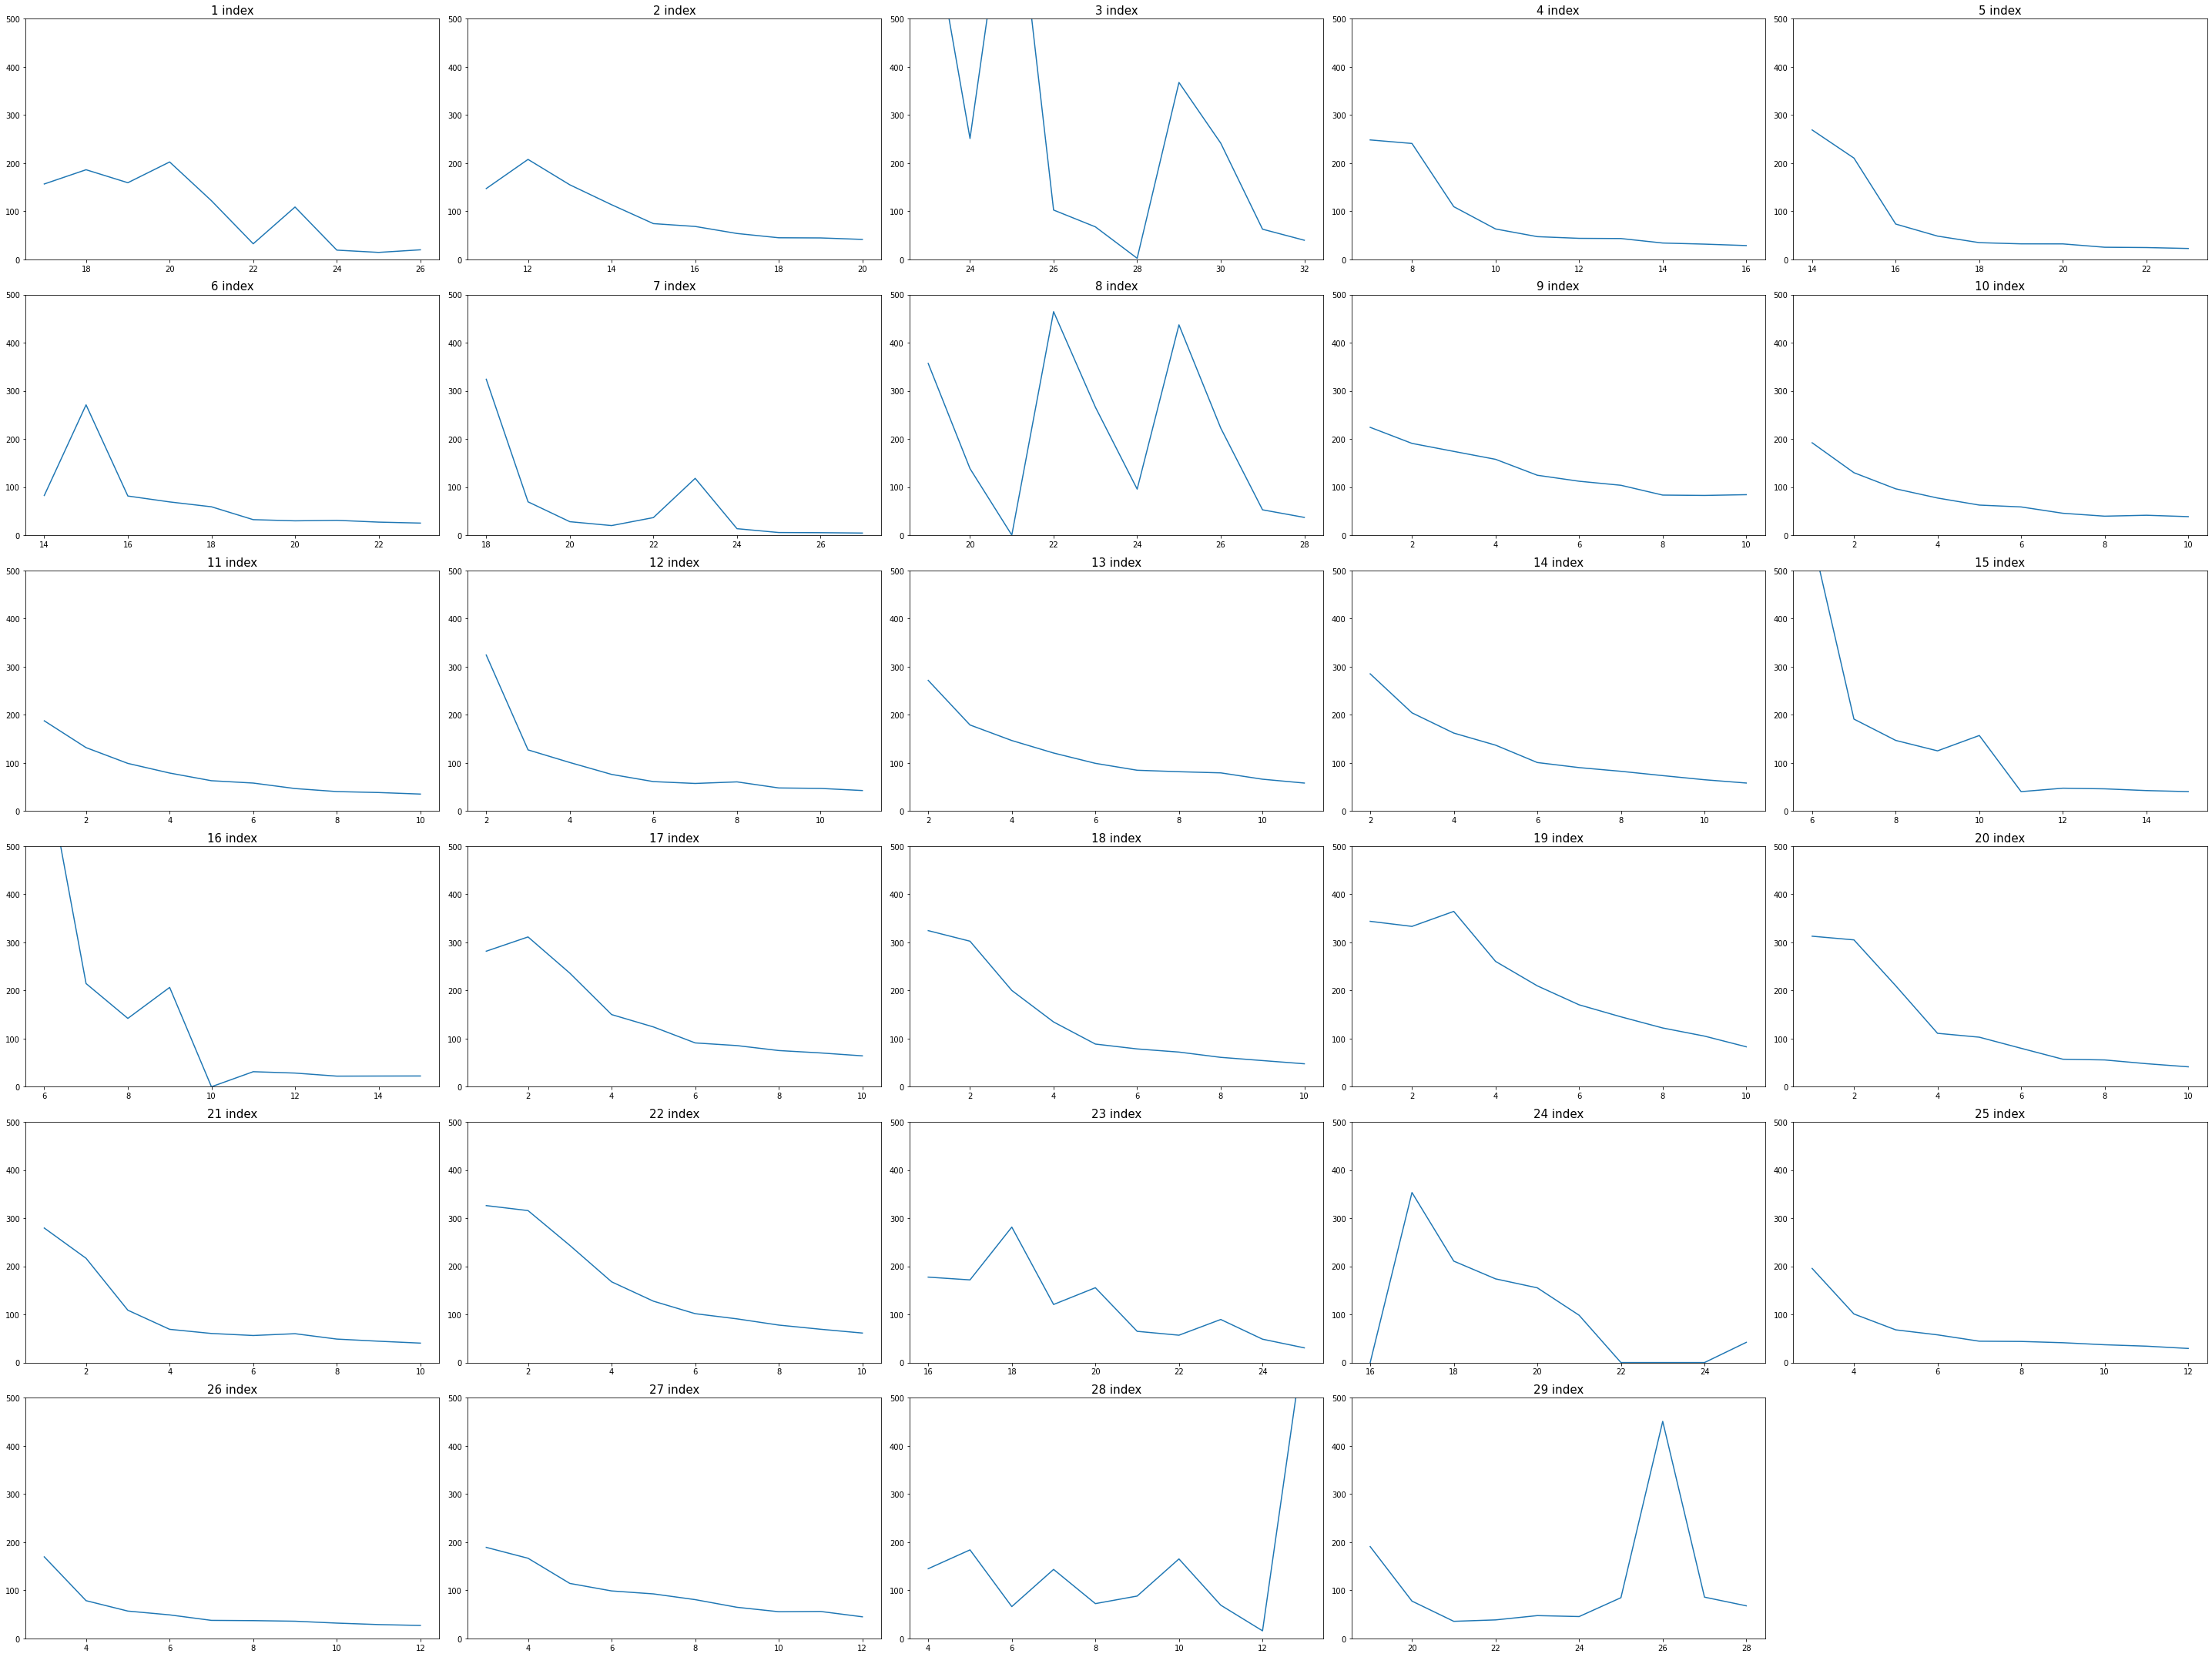

In [ ]:
plt.figure(figsize = (40,30))
for i in range(29):
  ax = plt.subplot(6,5,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_[i]['time'],data_[i]['X_t'],'-')
  plt.ylim([0,500])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_X_t_three-time.png')
plt.show()

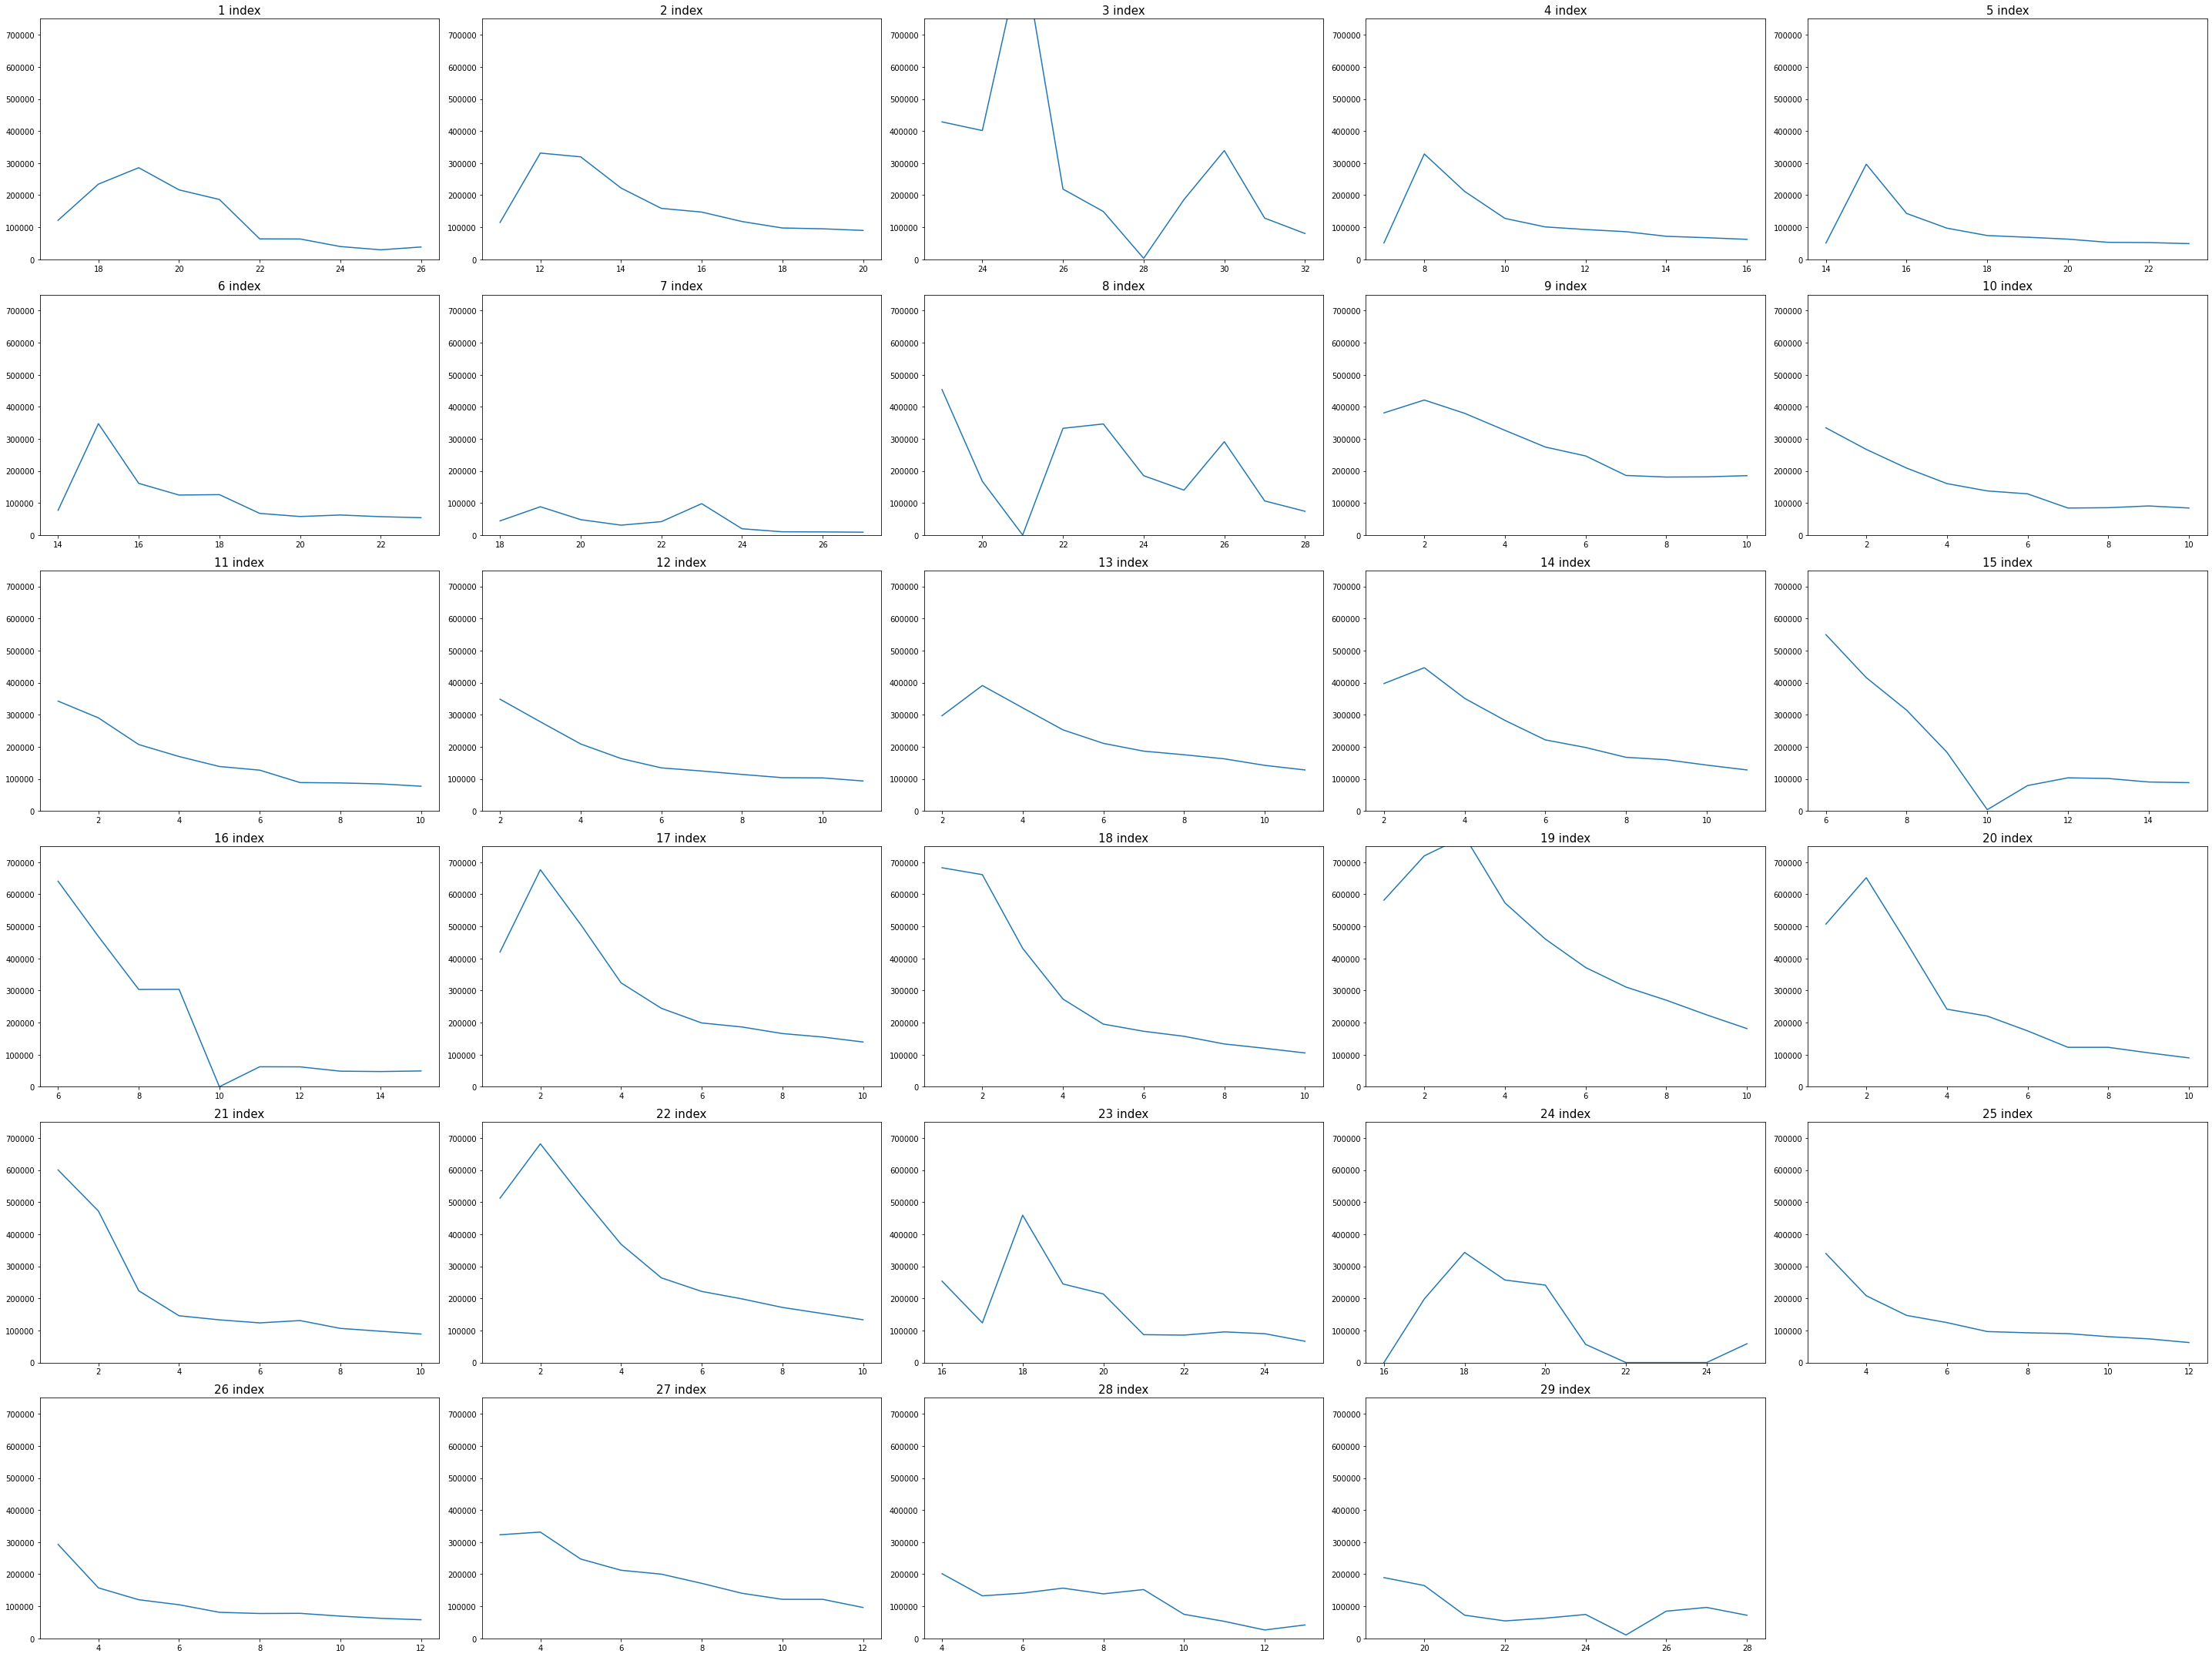

In [ ]:
plt.figure(figsize = (40,30))
for i in range(29):
  ax = plt.subplot(6,5,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_[i]['time'],data_[i]['Y_t'],'-')
  plt.ylim([0,750000])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_Y_t_three-time.png')
plt.show()

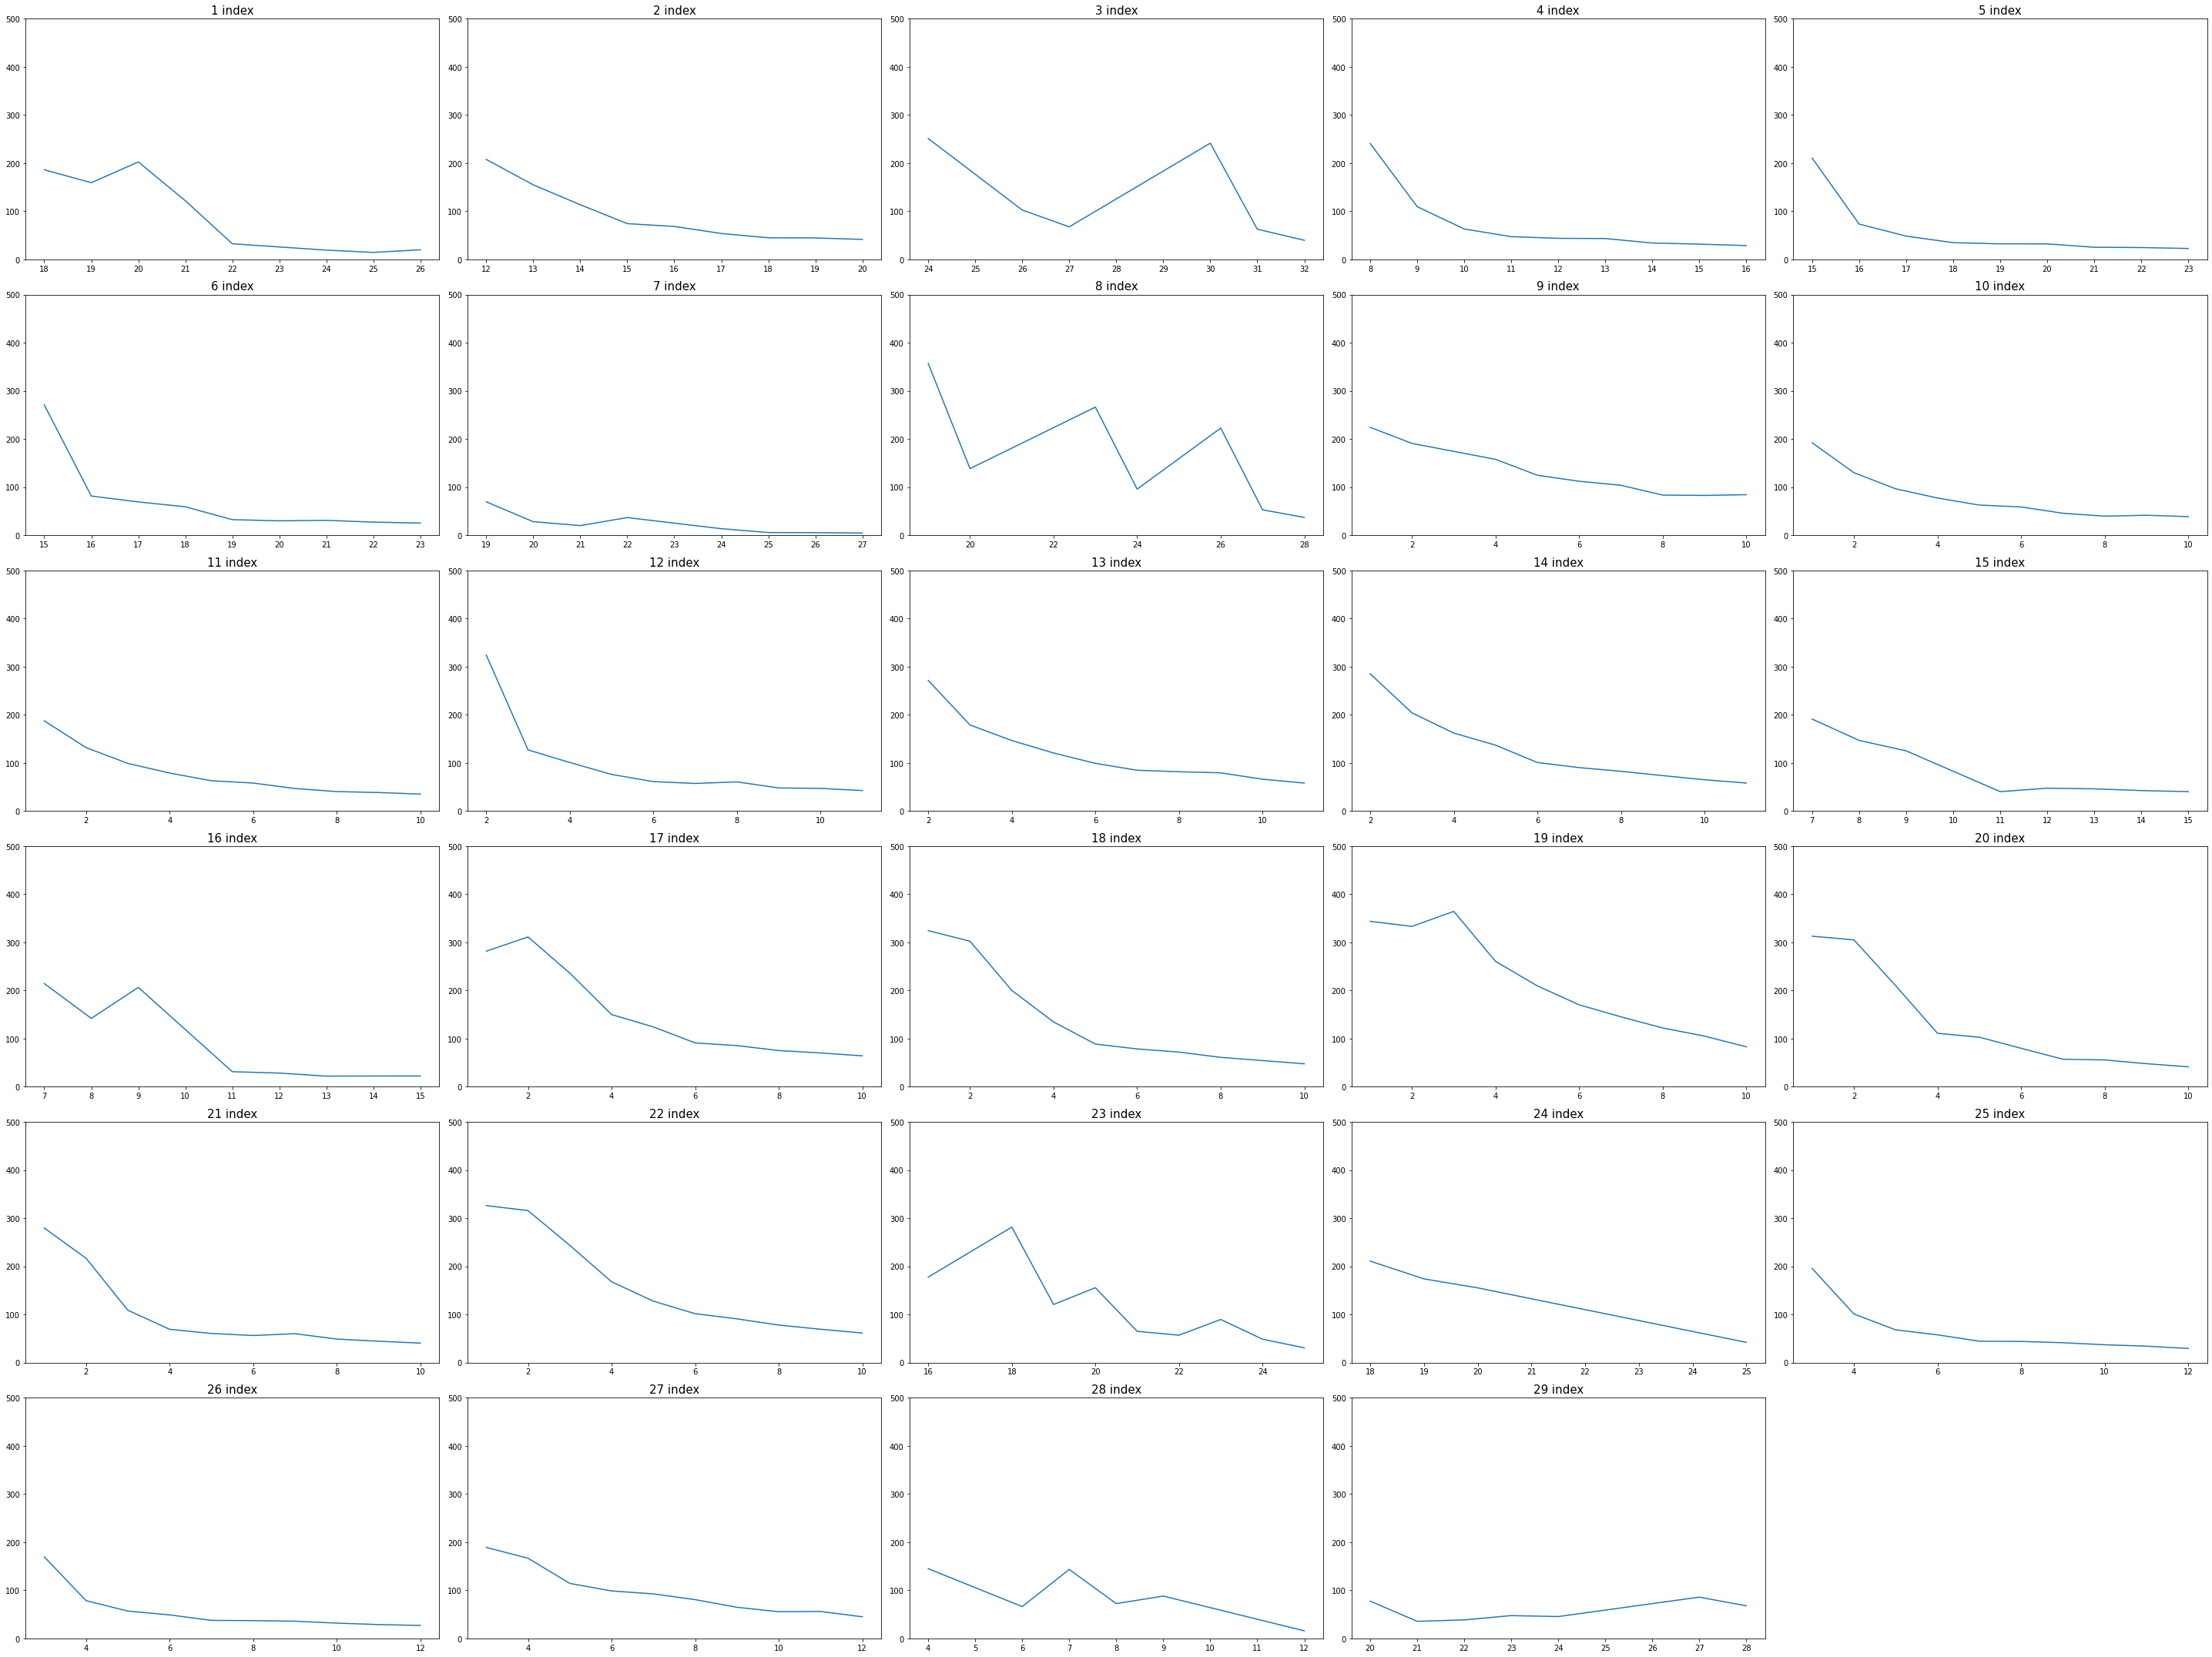

In [ ]:
plt.figure(figsize = (40,30))
for i in range(29):
  ax = plt.subplot(6,5,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_x[i]['time'],data_x[i]['X_t'],'-')
  plt.ylim([0,500])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_X_t_three-time(normal).png')
plt.show()

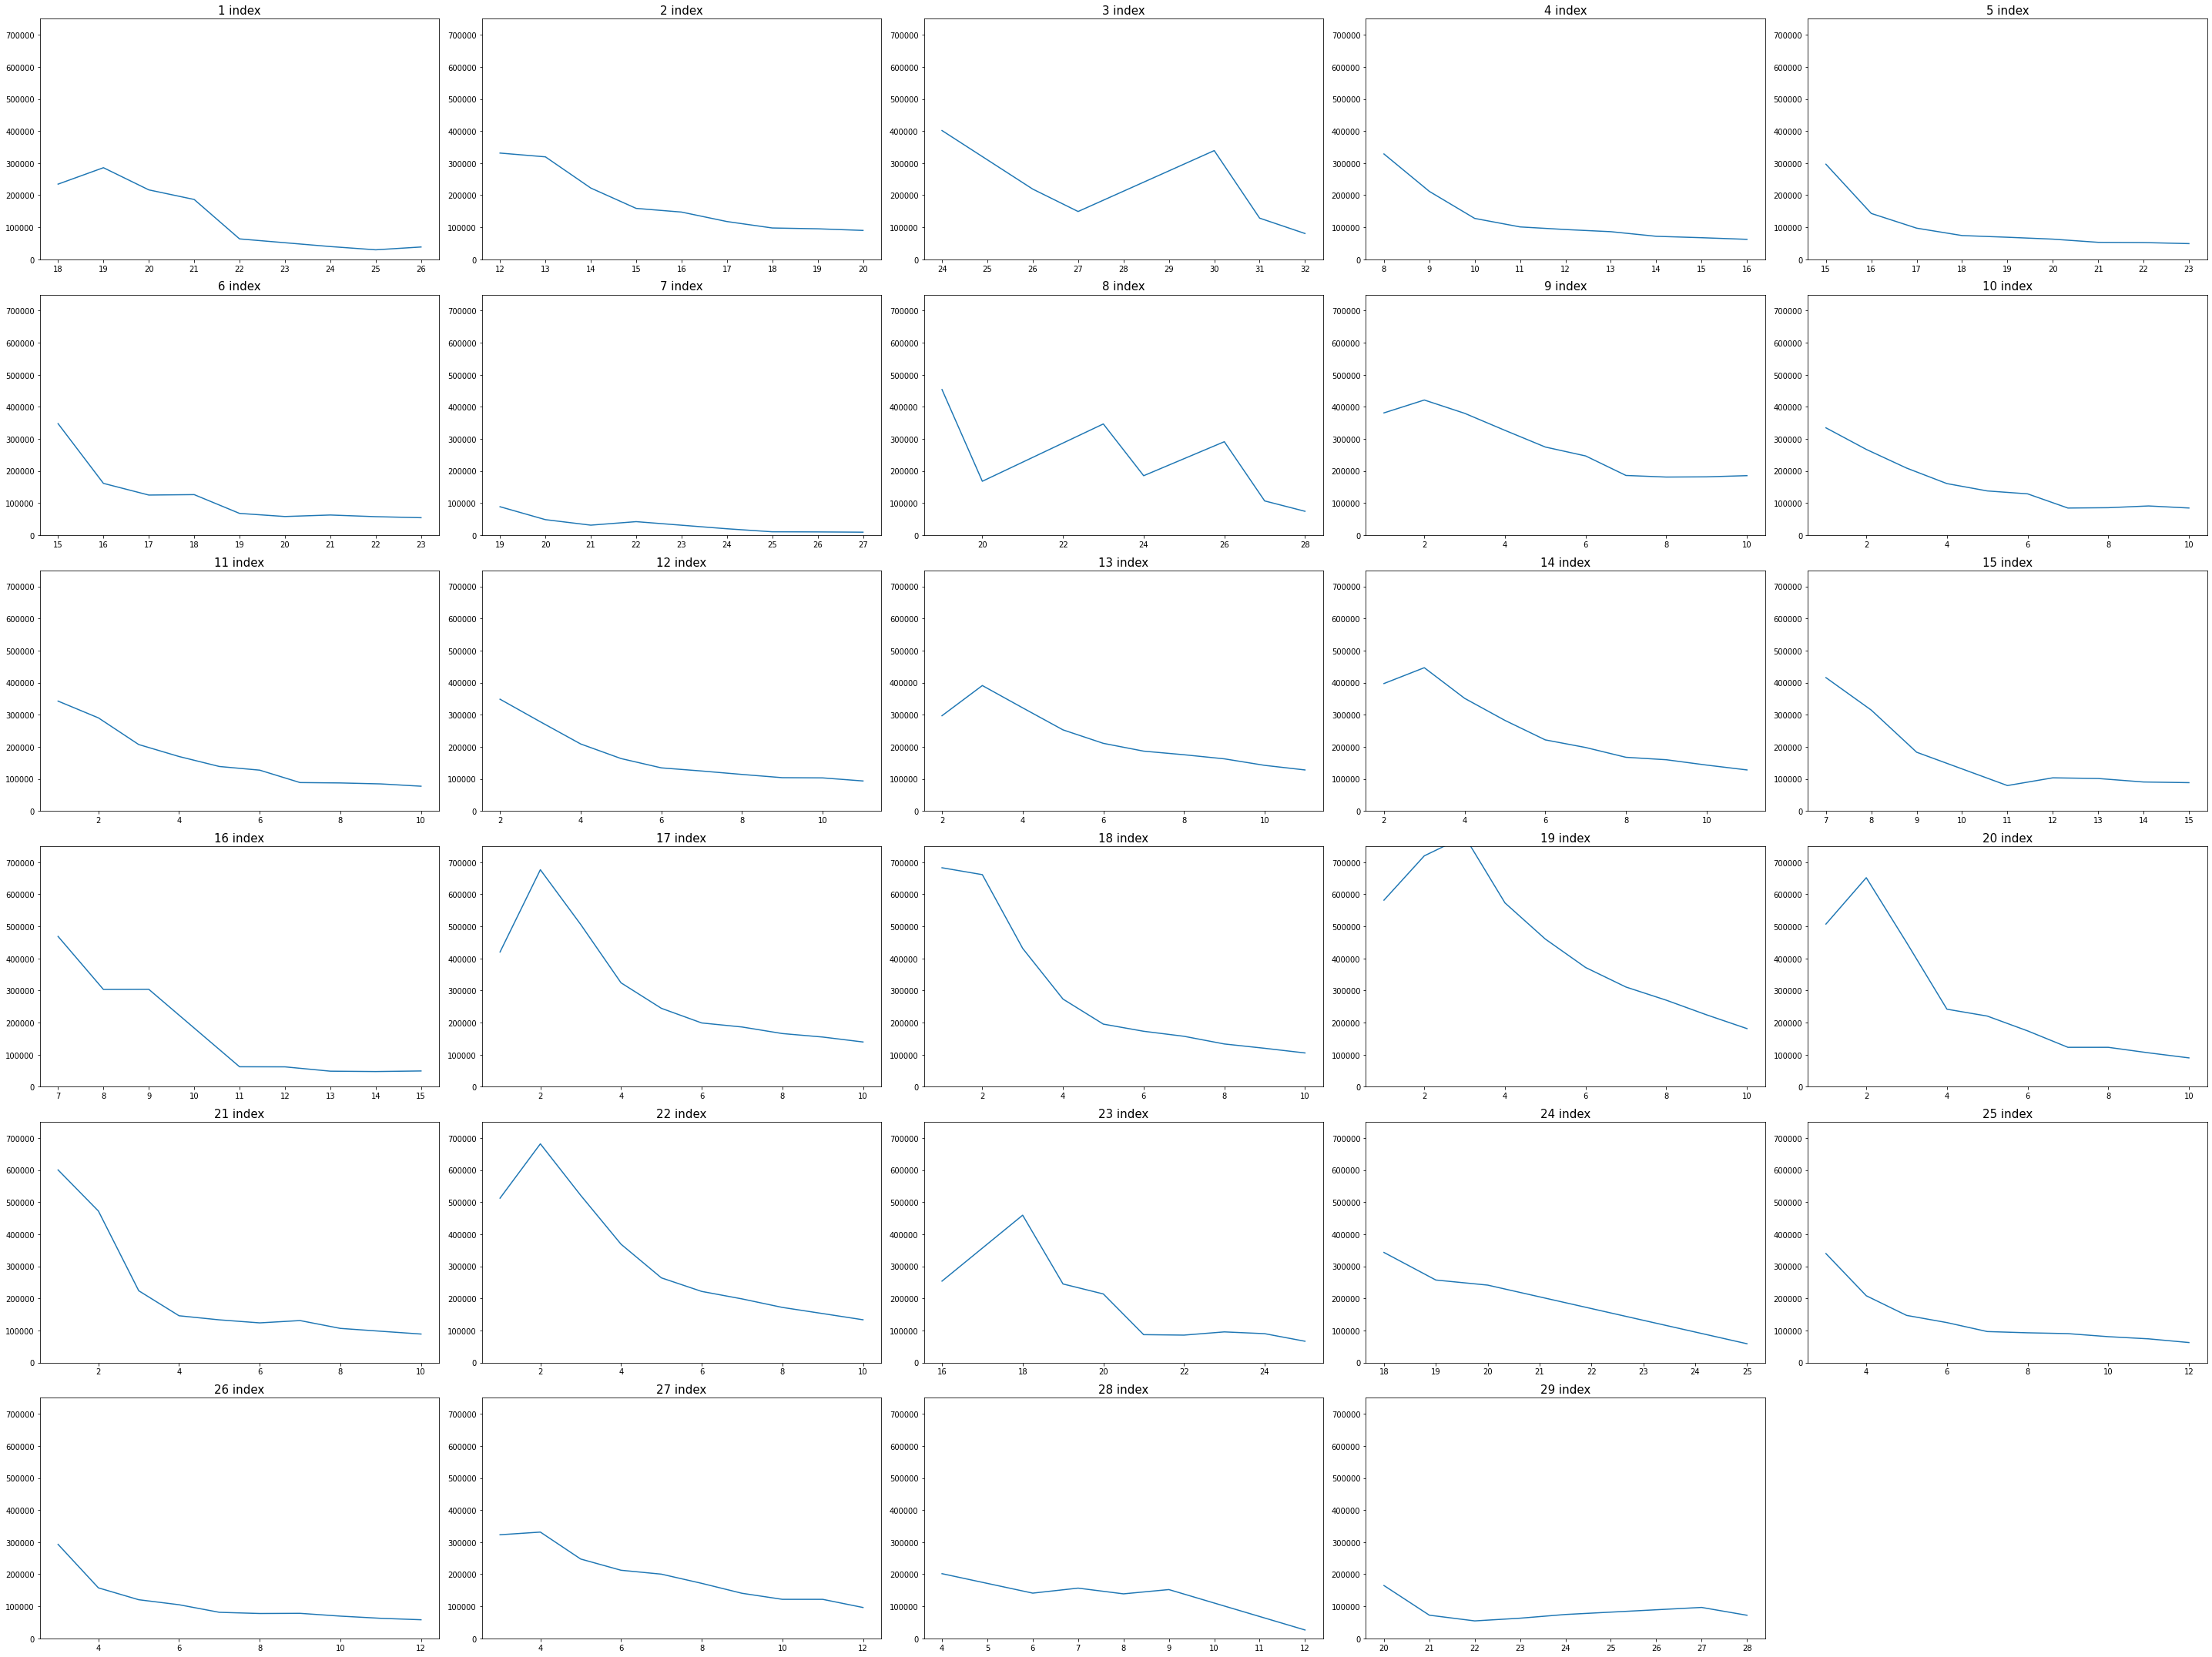

In [ ]:
plt.figure(figsize = (40,30))
for i in range(29):
  ax = plt.subplot(6,5,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_x[i]['time'],data_x[i]['Y_t'],'-')
  plt.ylim([0,750000])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_Y_t_three-time(normal).png')
plt.show()

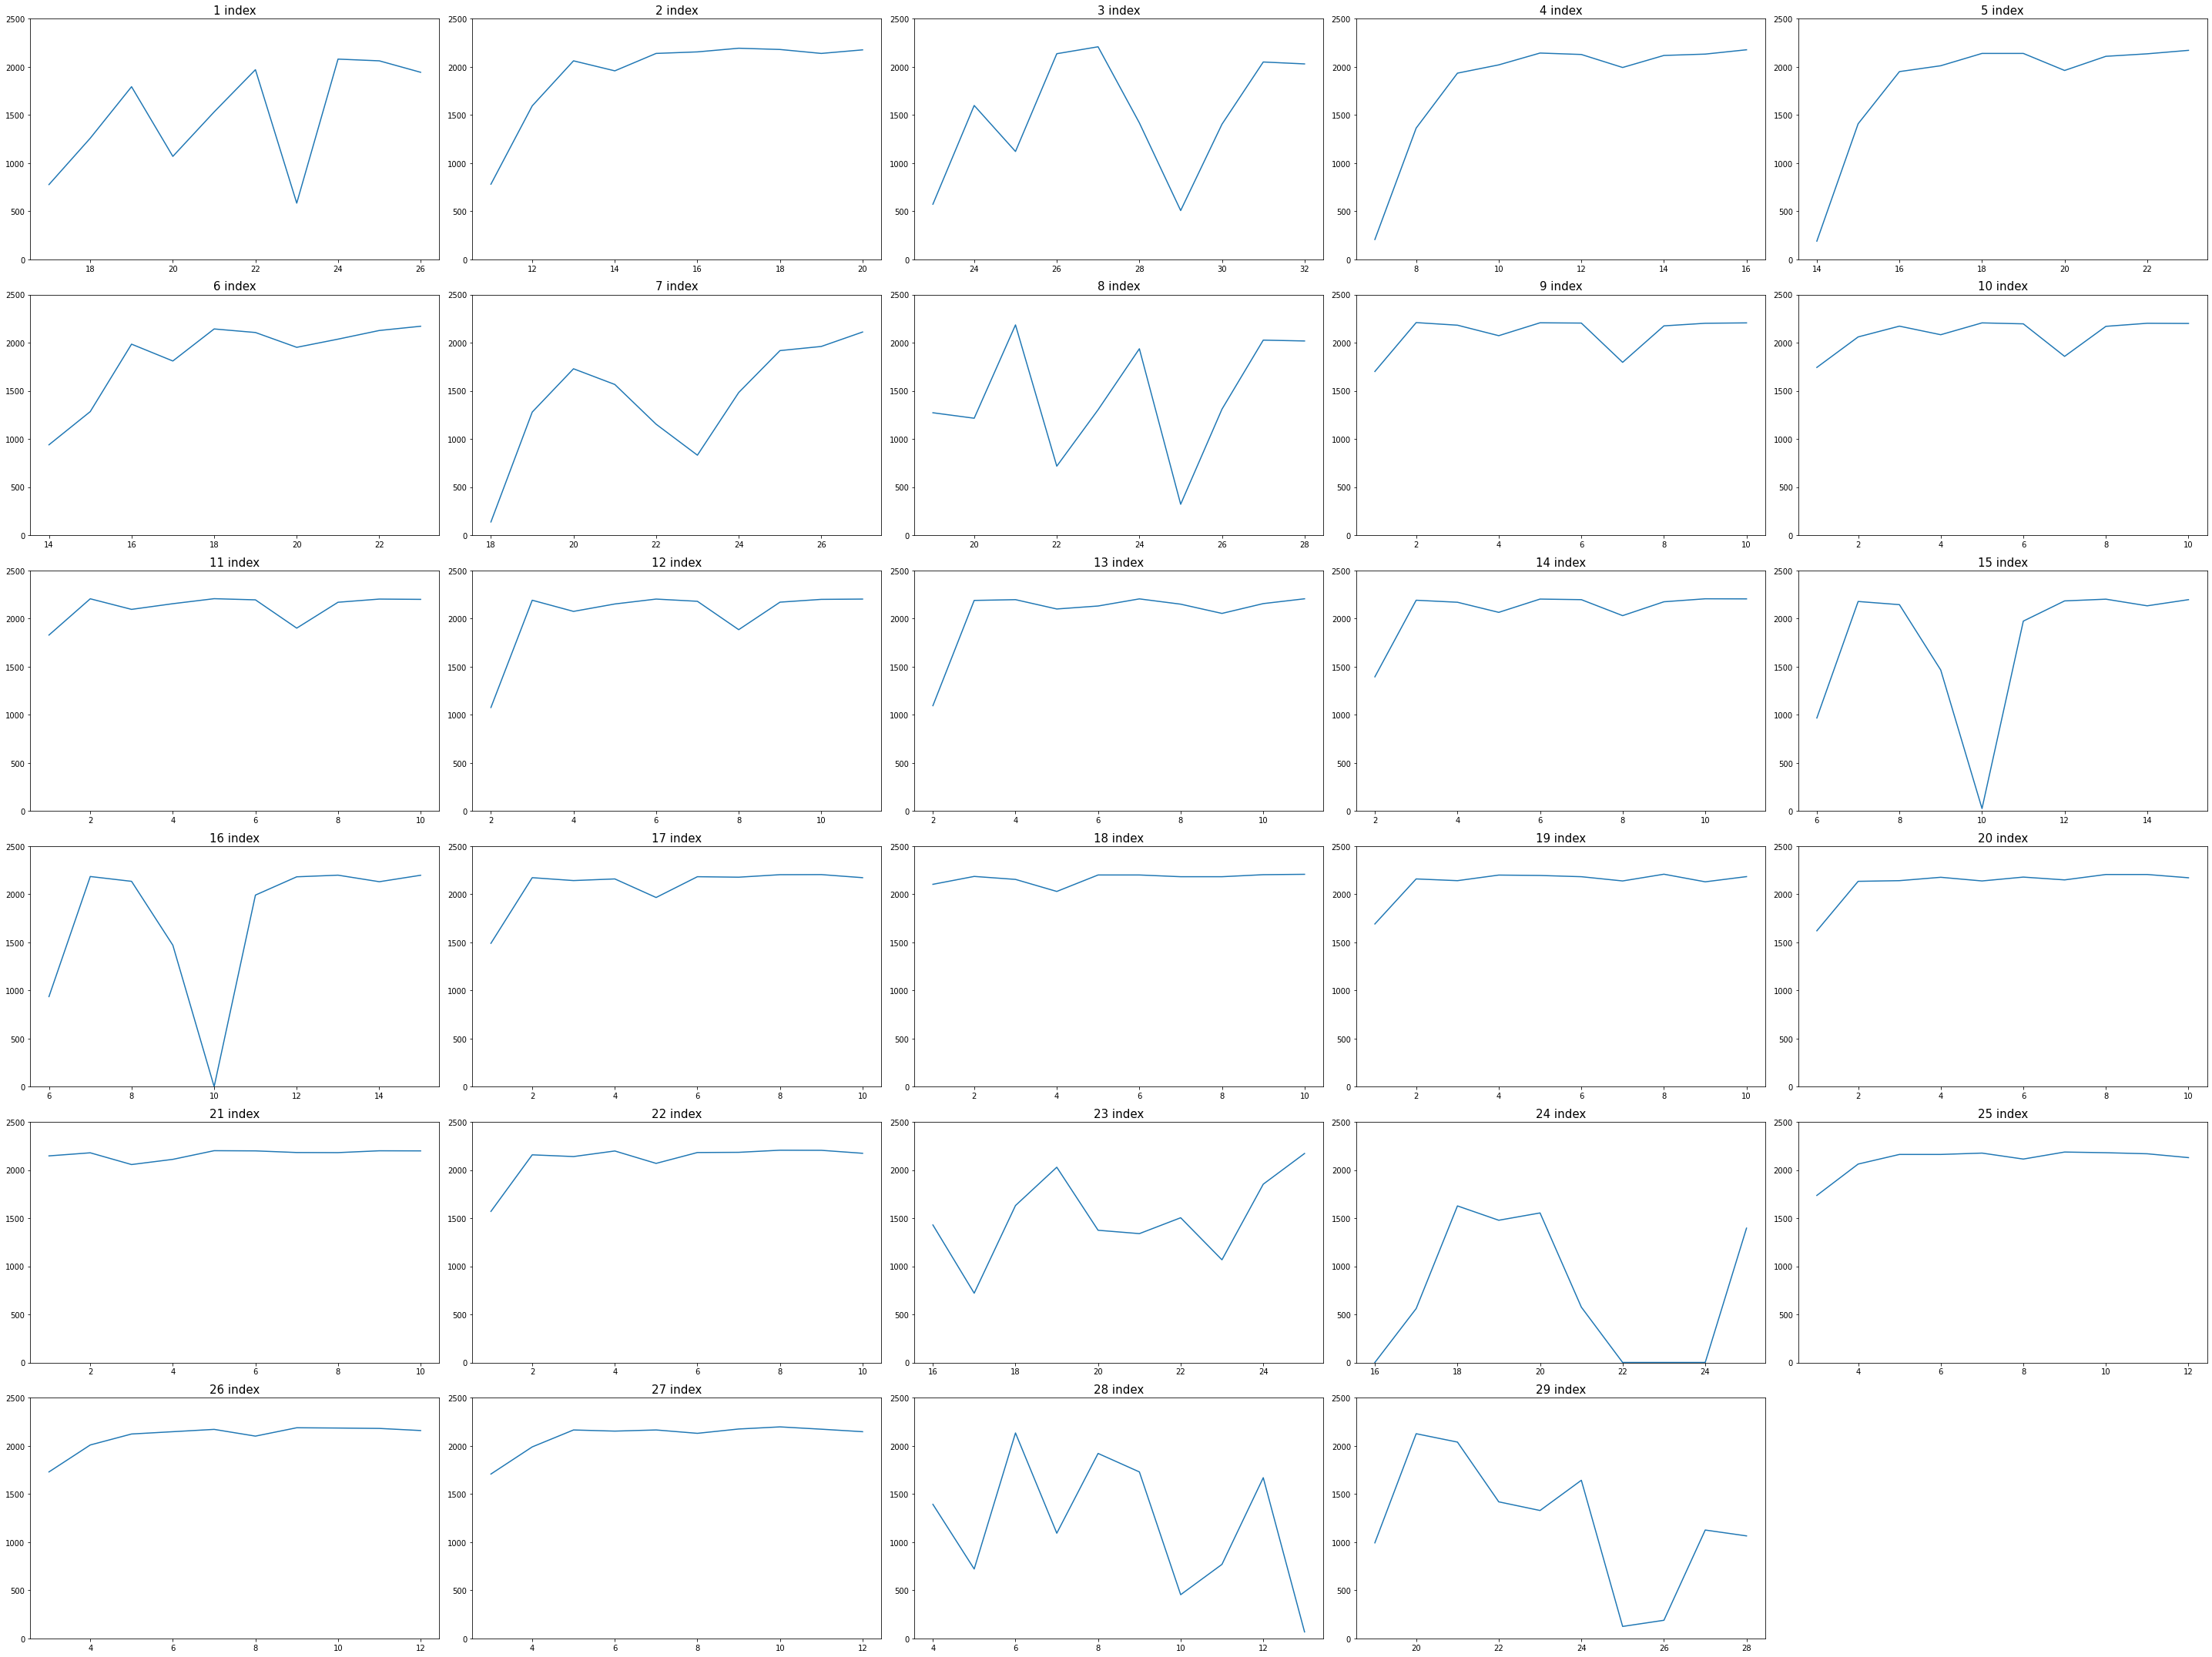

In [ ]:
plt.figure(figsize = (40,30))
for i in range(29):
  ax = plt.subplot(6,5,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_[i]['time'],data_[i]['J_t'],'-')
  plt.ylim([0,2500])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_J_t_three-time.png')
plt.show()

J_t_pred 추가

In [3]:
df2 = pd.read_csv("/gdrive/My Drive/DS_contest/Examdatathree.csv")

In [4]:
df2

,Unnamed: 0,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time,X_t,normal
0,15,724,292000,30000,121695.0,777.0,0,17,156.621622,0
1,15,724,292000,30000,234462.0,1259.0,0,18,186.228753,1
2,15,724,292000,30000,285696.0,1794.0,0,19,159.250836,1
3,15,724,292000,30000,216567.0,1070.0,0,20,202.399065,1
4,15,724,292000,30000,186633.0,1532.0,0,21,121.823107,1
...,...,...,...,...,...,...,...,...,...,...
285,43,863,591000,50000,74478.0,1643.0,28,24,45.330493,1
286,43,863,591000,50000,10482.0,124.0,28,25,84.532258,0
287,43,863,591000,50000,84810.0,188.0,28,26,451.117021,0
288,43,863,591000,50000,96483.0,1126.0,28,27,85.686501,1


In [5]:
df2 = df2.drop('Unnamed: 0', axis=1)

In [11]:
df2['over_1000'] = (df2['J_t']>1000)
df2 = df2.astype({'over_1000':'int'})
df2

,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time,X_t,normal,over_1000
0,724,292000,30000,121695.0,777.0,0,17,156.621622,0,0
1,724,292000,30000,234462.0,1259.0,0,18,186.228753,1,1
2,724,292000,30000,285696.0,1794.0,0,19,159.250836,1,1
3,724,292000,30000,216567.0,1070.0,0,20,202.399065,1,1
4,724,292000,30000,186633.0,1532.0,0,21,121.823107,1,1
...,...,...,...,...,...,...,...,...,...,...
285,863,591000,50000,74478.0,1643.0,28,24,45.330493,1,1
286,863,591000,50000,10482.0,124.0,28,25,84.532258,0,0
287,863,591000,50000,84810.0,188.0,28,26,451.117021,0,0
288,863,591000,50000,96483.0,1126.0,28,27,85.686501,1,1


In [12]:
df2['J_t_over_1000'] = df2['J_t'] * df2['over_1000']
df2

,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time,X_t,normal,over_1000,J_t_over_1000
0,724,292000,30000,121695.0,777.0,0,17,156.621622,0,0,0.0
1,724,292000,30000,234462.0,1259.0,0,18,186.228753,1,1,1259.0
2,724,292000,30000,285696.0,1794.0,0,19,159.250836,1,1,1794.0
3,724,292000,30000,216567.0,1070.0,0,20,202.399065,1,1,1070.0
4,724,292000,30000,186633.0,1532.0,0,21,121.823107,1,1,1532.0
...,...,...,...,...,...,...,...,...,...,...,...
285,863,591000,50000,74478.0,1643.0,28,24,45.330493,1,1,1643.0
286,863,591000,50000,10482.0,124.0,28,25,84.532258,0,0,0.0
287,863,591000,50000,84810.0,188.0,28,26,451.117021,0,0,0.0
288,863,591000,50000,96483.0,1126.0,28,27,85.686501,1,1,1126.0


In [14]:
df_list = []
for i in range(29):
  sum_J_t = 0
  sum_over_1000 = 0
  for j in range(10):
    if (i==23 or i==27):
      sum_J_t += df2['J_t'][i*10+j]
      sum_over_1000 += 1
    else:
      sum_J_t += df2['J_t_over_1000'][i*10+j]
      sum_over_1000 += df2['over_1000'][i*10+j]
  for k in range(10):
    df_list.append(sum_J_t / sum_over_1000)
df_list

[1714.25,
 1714.25,
 1714.25,
 1714.25,
 1714.25,
 1714.25,
 1714.25,
 1714.25,
 1714.25,
 1714.25,
 2067.222222222222,
 2067.222222222222,
 2067.222222222222,
 2067.222222222222,
 2067.222222222222,
 2067.222222222222,
 2067.222222222222,
 2067.222222222222,
 2067.222222222222,
 2067.222222222222,
 1746.25,
 1746.25,
 1746.25,
 1746.25,
 1746.25,
 1746.25,
 1746.25,
 1746.25,
 1746.25,
 1746.25,
 2001.888888888889,
 2001.888888888889,
 2001.888888888889,
 2001.888888888889,
 2001.888888888889,
 2001.888888888889,
 2001.888888888889,
 2001.888888888889,
 2001.888888888889,
 2001.888888888889,
 2003.6666666666667,
 2003.6666666666667,
 2003.6666666666667,
 2003.6666666666667,
 2003.6666666666667,
 2003.6666666666667,
 2003.6666666666667,
 2003.6666666666667,
 2003.6666666666667,
 2003.6666666666667,
 1957.2222222222222,
 1957.2222222222222,
 1957.2222222222222,
 1957.2222222222222,
 1957.2222222222222,
 1957.2222222222222,
 1957.2222222222222,
 1957.2222222222222,
 1957.2222222222222,
 

In [15]:
df2['J_t_pred'] = df_list
df2

,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time,X_t,normal,over_1000,J_t_over_1000,J_t_pred
0,724,292000,30000,121695.0,777.0,0,17,156.621622,0,0,0.0,1714.250000
1,724,292000,30000,234462.0,1259.0,0,18,186.228753,1,1,1259.0,1714.250000
2,724,292000,30000,285696.0,1794.0,0,19,159.250836,1,1,1794.0,1714.250000
3,724,292000,30000,216567.0,1070.0,0,20,202.399065,1,1,1070.0,1714.250000
4,724,292000,30000,186633.0,1532.0,0,21,121.823107,1,1,1532.0,1714.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
285,863,591000,50000,74478.0,1643.0,28,24,45.330493,1,1,1643.0,1535.571429
286,863,591000,50000,10482.0,124.0,28,25,84.532258,0,0,0.0,1535.571429
287,863,591000,50000,84810.0,188.0,28,26,451.117021,0,0,0.0,1535.571429
288,863,591000,50000,96483.0,1126.0,28,27,85.686501,1,1,1126.0,1535.571429


In [16]:
df2 = df2.drop(['over_1000','J_t_over_1000'],axis=1)
df2

,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time,X_t,normal,J_t_pred
0,724,292000,30000,121695.0,777.0,0,17,156.621622,0,1714.250000
1,724,292000,30000,234462.0,1259.0,0,18,186.228753,1,1714.250000
2,724,292000,30000,285696.0,1794.0,0,19,159.250836,1,1714.250000
3,724,292000,30000,216567.0,1070.0,0,20,202.399065,1,1714.250000
4,724,292000,30000,186633.0,1532.0,0,21,121.823107,1,1714.250000
...,...,...,...,...,...,...,...,...,...,...
285,863,591000,50000,74478.0,1643.0,28,24,45.330493,1,1535.571429
286,863,591000,50000,10482.0,124.0,28,25,84.532258,0,1535.571429
287,863,591000,50000,84810.0,188.0,28,26,451.117021,0,1535.571429
288,863,591000,50000,96483.0,1126.0,28,27,85.686501,1,1535.571429


In [17]:
df2.to_csv('/gdrive/My Drive/DS_contest/Examdatathree.csv')